In [36]:
import pickle
import pandas as pd
import numpy as np

In [37]:
with open("results/LSTM/bin1/Performance_metrices_LSTM_bin_0.pkl", "rb") as f:
    data1 = pickle.load(f)
average_performance1 = 0
for i in range(len(data1)):
    print(f"Trial {i+1}: {data1[i]['best_trial_value']}")
    average_performance1 += data1[i]['best_trial_value']
average_performance1 /= len(data1)
print(f"Average performance: {average_performance1}")

Trial 1: 0.0427139364263055
Trial 2: 0.862690512030841
Trial 3: 0.07233504556583287
Trial 4: 1.2407182845782143
Trial 5: 0.1779942969924836
Trial 6: 2.1860352107821917
Trial 7: 1.1657755491175865
Trial 8: 0.5318148639270904
Trial 9: 0.14223361525091188
Trial 10: 0.25124752691105084
Trial 11: 0.21585168222145631
Trial 12: 0.20418610715434818
Trial 13: 0.18522005913163822
Trial 14: 0.39546269288957697
Trial 15: 0.8062104932583363
Average performance: 0.565365991749191


In [38]:
data2 = []
for i in range(14):
    with open(f"results/LSTM/bin2/Performance_metrices_LSTM_bin_2_stock_{i+1}.pkl", "rb") as f:
        data2.append(pickle.load(f))
average_performance2 = 0
for i in range(len(data2)):
    print(f"Trial {i+1}: {data2[i]['best_trial_value']}")
    average_performance2 += data2[i]['best_trial_value']
average_performance2 /= len(data2)
print(f"Average performance: {average_performance2}")

Trial 1: 6.291532516479492
Trial 2: 6.330022811889648
Trial 3: 3.5663704872131348
Trial 4: 6.503300189971924
Trial 5: 1.8125381469726562
Trial 6: 8.98238754272461
Trial 7: 2.5141074657440186
Trial 8: 10.257462501525879
Trial 9: 5.144466400146484
Trial 10: 8.022873878479004
Trial 11: 5.272713661193848
Trial 12: 13.277997016906738
Trial 13: 3.41195011138916
Trial 14: 4.0938639640808105
Average performance: 6.105827621051243


In [39]:
data3 = []
for i in range(12):
    with open(f"results/LSTM/bin3/Performance_metrices_LSTM_bin_3_stock_{i+1}.pkl", "rb") as f:
        data3.append(pickle.load(f))
average_performance3= 0
for i in range(len(data3)):
    print(f"Trial {i+1}: {data3[i]['best_trial_value']}")
    average_performance3+= data3[i]['best_trial_value']
average_performance3/= len(data3)
print(f"Average performance: {average_performance3}")

Trial 1: 9.576276779174805
Trial 2: 22.33321762084961
Trial 3: 14.779107093811035
Trial 4: 9.337669372558594
Trial 5: 8.195090293884277
Trial 6: 8.452316284179688
Trial 7: 8.858335494995117
Trial 8: 11.232804298400879
Trial 9: 7.340895175933838
Trial 10: 7.306420803070068
Trial 11: 10.686223983764648
Trial 12: 9.785004615783691
Average performance: 10.656946818033854


In [40]:
data4 = []
for i in range(10):
    with open(f"results/LSTM/bin4/Performance_metrices_LSTM_bin_4_stock_{i+1}.pkl", "rb") as f:
        data4.append(pickle.load(f))
average_performance4= 0
for i in range(len(data4)):
    print(f"Trial {i+1}: {data4[i]['best_trial_value']}")
    average_performance4+= data4[i]['best_trial_value']
average_performance4/= len(data4)
print(f"Average performance: {average_performance4}")

Trial 1: 16.092548370361328
Trial 2: 15.935334205627441
Trial 3: 5.346135139465332
Trial 4: 14.591180801391602
Trial 5: 55.87663650512695
Trial 6: 23.43740463256836
Trial 7: 29.00269889831543
Trial 8: 20.18584632873535
Trial 9: 11.191671371459961
Trial 10: 11.976339340209961
Average performance: 20.363579559326173


In [41]:
data5 = []
for i in range(14):
    with open(f"results/LSTM/bin5/Performance_metrices_LSTM_bin_5_stock_{i+1}.pkl", "rb") as f:
        data5.append(pickle.load(f))
average_performance5= 0
for i in range(len(data5)):
    print(f"Trial {i+1}: {data5[i]['best_trial_value']}")
    average_performance5+= data5[i]['best_trial_value']
average_performance5/= len(data5)
print(f"Average performance: {average_performance5}")

Trial 1: 21.82815170288086
Trial 2: 14.696266174316406
Trial 3: 16.703231811523438
Trial 4: 16.025503158569336
Trial 5: 20.039194107055664
Trial 6: 25.890451431274414
Trial 7: 25.870027542114258
Trial 8: 16.288591384887695
Trial 9: 24.49911117553711
Trial 10: 8.993456840515137
Trial 11: 18.75170135498047
Trial 12: 22.493175506591797
Trial 13: 8.640944480895996
Trial 14: 15.449372291564941
Average performance: 18.297798497336252


Text(0.5, 1.0, 'LSTM Performance Over Trials')

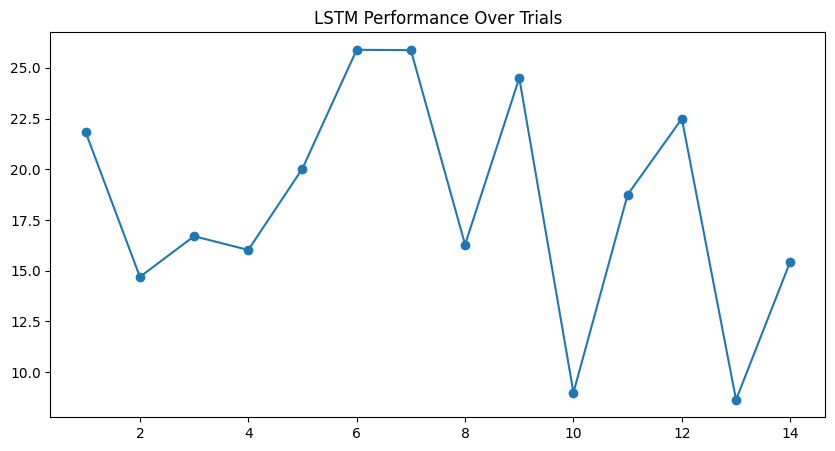

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot([i+1 for i in range(len(data))], [d['best_trial_value'] for d in data], marker='o')
plt.title("LSTM Performance Over Trials")

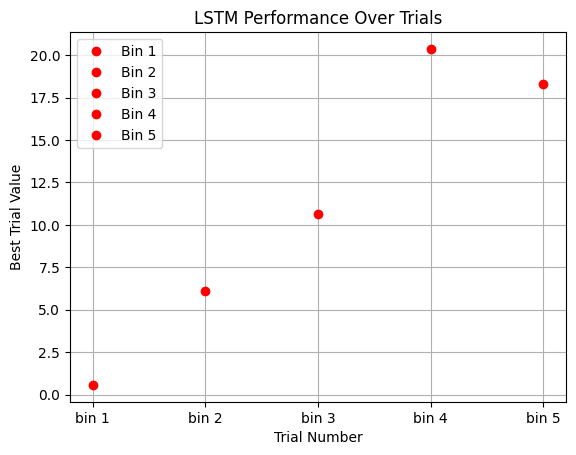

In [48]:
# plot average performance stored in data1, data2, data3, data4, data5
plt.title("LSTM Performance Over Trials")
plt.plot('bin 1', average_performance1, 'ro', label='Bin 1')
plt.plot('bin 2', average_performance2, 'ro', label='Bin 2')
plt.plot('bin 3', average_performance3, 'ro', label='Bin 3')
plt.plot('bin 4', average_performance4, 'ro', label='Bin 4')
plt.plot('bin 5', average_performance5, 'ro', label='Bin 5')

plt.xlabel("Trial Number")
plt.ylabel("Best Trial Value")
plt.legend()
plt.grid()
plt.show()